## Observations and Insights 

The observations inferred from the data are:
- As can be seen in the pie charts, the gender distribution of the mice is almost 50% male to female. 
- Tumor volumes in mice treated with Capomulin and Ramicane is much lower than the mice treated with Infubinol and Ceftamin; with Ramicane showing the most promising results as can be seen in the box and whisker plot. Ramicane's tumor volumes are slightly lower than Capomulin. 
- As seen by the line graph, the tumor volume decreased over time for the mouse treated with Capomulin. 
- We can also observe from the scatter plot that average tumor volume is dependent on the weight of the mouse with  correlation coeffiecent being 0.84, suggesting a strong correlation between the two. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = data_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = data_df[data_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = data_df.loc[data_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_df["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

data = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
data

mean = data.mean().round(3)
median = data.median().round(3)
var = data.var().round(3)
std = data.std().round(3)
sem = data.sem().round(3)

summary_table = pd.DataFrame({"Mean":mean,
                              "Median": median,
                              "Variance": var,
                              "Std": std,
                              "SEM": sem})
summary_table


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

data_df = cleaned_df.groupby(["Drug Regimen"])
summary_df = data_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]).round(3)
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

Text(0.5, 1, 'Number of mice for each Drug Regimen')

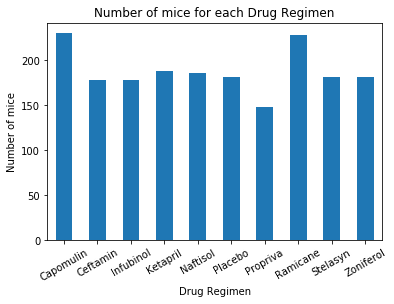

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_drug = data_df.count()
barplot = grouped_drug.plot.bar(y="Mouse ID",rot=30,legend=None)
barplot.set_ylabel("Number of mice")
plt.savefig("Images/BarChart_pandas.png")
barplot.set_title("Number of mice for each Drug Regimen")


Text(0.5, 1, 'Number of mice for each Drug Regimen')

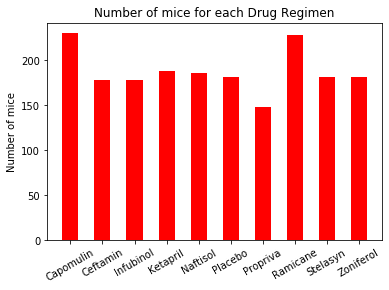

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x= grouped_drug.index
y = grouped_drug["Mouse ID"]
plt.bar(x,y,color="r", align="center", width = 0.5)
plt.xticks(rotation = 30)
plt.ylabel("Number of mice")
plt.savefig("Images/BarChart_pyplot.png")
plt.title("Number of mice for each Drug Regimen")

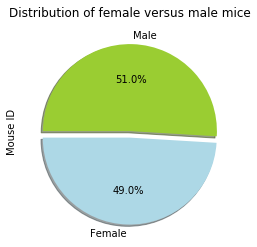

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieplot_df = cleaned_df.groupby("Sex").count()
piechart = pieplot_df.plot.pie(y="Mouse ID", shadow=True, startangle=180,
                    colors=["lightblue","yellowgreen"],explode=[0.075,0],autopct="%1.1f%%",legend=None,fontsize=10)
piechart.set_title("Distribution of female versus male mice")
plt.savefig("Images/PieChart_pandas.png")

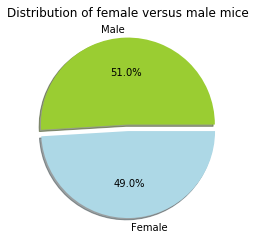

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_mf = cleaned_df["Sex"].value_counts()
pie_labels = ["Male","Female"]
colors = ["yellowgreen","lightblue"]
explode = (0.075,0)

plt.pie(mice_mf,labels=pie_labels,explode=explode,colors=colors,shadow=True,autopct="%1.1f%%")
plt.title("Distribution of female versus male mice")
plt.savefig("Images/PieChart_pyplot.png")


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumorvol_df = cleaned_df.loc[(cleaned_df["Drug Regimen"]== "Capomulin") | (cleaned_df["Drug Regimen"]== "Ramicane") 
                     | (cleaned_df["Drug Regimen"]== "Infubinol") |(cleaned_df["Drug Regimen"]== "Ceftamin") ]

# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped = tumorvol_df.groupby("Mouse ID")["Timepoint"].max()
temp_df = pd.DataFrame({"Mouse ID":mouse_grouped.index, "Timepoint":mouse_grouped.values})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(left=temp_df, right=tumorvol_df, left_on=["Mouse ID","Timepoint"],right_on=["Mouse ID","Timepoint"])
new_df = new_df.set_index(["Drug Regimen","Mouse ID"])
new_df = new_df.sort_index()
final_df = new_df[["Tumor Volume (mm3)"]]
final_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
              
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumorvol_data = final_df["Tumor Volume (mm3)"]
for x in treatments:
    quartiles = tumorvol_data[x].quantile([0.25,0.5,0.75]).round(2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq).round(2)
    
    # add subset     
    
    # Determine outliers using upper and lower bounds
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    
    tumor_vol.append(tumorvol_data[x])
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outlier = final_df["Tumor Volume (mm3)"][x].loc[(final_df["Tumor Volume (mm3)"][x] > upper_bound) | (final_df["Tumor Volume (mm3)"][x] < lower_bound) ]
    
    print(f"{x}:")
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"The the median of {x} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"The number of outliers in {x} data are {len(outlier)}")
    print(f"Outliers: {outlier}")
    print(f"-----------------------------------------------")


Capomulin:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
The number of outliers in Capomulin data are 0
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------------------
Ramicane:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The number of outliers in Ramicane data are 0
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------------------
Infubinol:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17

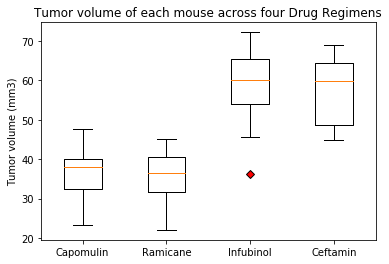

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax = plt.subplots()
ax.set_title('Tumor volume of each mouse across four Drug Regimens')
ax.set_ylabel('Tumor volume (mm3)')
ax.boxplot(tumor_vol, flierprops=red_diamond)
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.savefig("Images/Boxwhisker_plot.png")
plt.show()

## Line and Scatter Plots

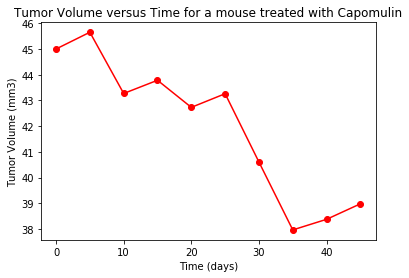

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "b128")]
x_axis = df["Timepoint"]
y_axis = df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker="o", color="red")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume versus Time for a mouse treated with Capomulin")
plt.savefig("Images/Lineplot_tumorvol_vs_time.png")


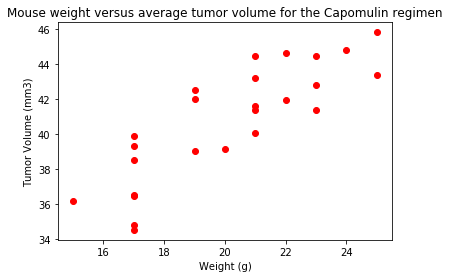

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
scatter_df = scatter_df.groupby("Mouse ID").mean()
x_axis = scatter_df["Weight (g)"]
y_axis = scatter_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.savefig("Images/Scatterplot_weight_vs_tumorvol.png")


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}") 


The correlation coefficient between mouse weight and average tumor volume is 0.84


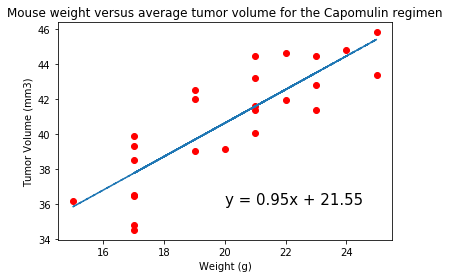

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis) 

# equation of line to calculate predicted average tumor volume

line = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.plot(x_axis,line,"--")
plt.annotate(line_eq,(20,36),fontsize=15,color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/linregress_model.png")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.show()
